## Machine Learning Project Lifecycle

- `Project Name`: **Real Estate Property Price Prediction**

1. data gathering: webscrape/ fetch from cloud or dbs:
2. data assesment: find out what to clean
3. data cleaning: clean data
4. eda
5. model training / hyper parameter tuning / model evaluation
6. model deployment
7. monitor & retraining

### data gathering

- We are using data sourced from kaggle, In real world, we get data from the project owner, we might have to webscrape or fetch from dbs, cloud etc

In [521]:
import pandas as pd
import numpy as np
import re
import ast

In [522]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

In [523]:
df1 = pd.read_csv(r"data/99acre_raw_data/flats.csv")
df2 = pd.read_csv(r"data/99acre_raw_data/houses.csv")

In [524]:
df1.columns

Index(['property_name', 'link', 'society', 'price', 'rate', 'areaWithType',
       'bedRoom', 'bathroom', 'balcony', 'additionalRoom', 'address',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations', 'description',
       'furnishDetails', 'features', 'rating', 'property_id'],
      dtype='object')

In [525]:
df2.columns

Index(['property_name', 'link', 'society', 'price', 'rate', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'address', 'noOfFloor', 'facing', 'agePossession', 'nearbyLocations',
       'description', 'furnishDetails', 'features', 'rating', 'property_id'],
      dtype='object')

In [526]:
df1['property_type'] = 'flat'
df2['property_type'] = 'house'

In [527]:
df3 = pd.concat([df1, df2], ignore_index=True)

In [528]:
df3.sample(5)

,property_name,link,society,price,rate,areaWithType,bedRoom,bathroom,balcony,additionalRoom,...,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id,property_type,area,noOfFloor
1652,2 BHK Flat in Sector 90 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Shree Vardhman Flora3.8 ★,65 Lac,"₹ 4,814/sq.ft.",Super Built up area 1350(125.42 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,...,1 to 5 Year Old,"['IRIS Broadway Mall', 'Dwarka Expressway', 'S...",This 2 bhk flat is located in shree vardhman f...,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Green Area5 out of 5', 'Construction5 out of...",J65861506,flat,NaN,NaN
1164,2 BHK Flat in Sector 107 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Signature Global Solera3.7 ★,36 Lac,"₹ 6,581/sq.ft.",Carpet area: 547 (50.82 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,NaN,...,1 to 5 Year Old,"['Gurgaon Dreamz Mall', 'Dwarka Expressway', ""...","Situated in sector 107 gurgaon, signature glob...","['1 Fan', '1 Light', '1 Modular Kitchen', 'No ...","['Power Back-up', 'Intercom Facility', 'Lift(s...","['Green Area4.5 out of 5', 'Construction4.5 ou...",Z69217290,flat,NaN,NaN
2938,2 BHK Flat in Sector 99A Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Prime Habitat,32 Lac,"₹ 4,657/sq.ft.",Super Built up area 687(63.82 sq.m.)Built Up a...,2 Bedrooms,2 Bathrooms,1 Balcony,NaN,...,1 to 5 Year Old,"['The Hive Mall', 'Omaxe Gurgaon Mall', 'Gurug...",This lovely 2 bhk apartment/flat in sector-99a...,"['1 Fan', '1 Exhaust Fan', '1 Light', '1 Modul...","['Security / Fire Alarm', 'Lift(s)', 'Maintena...","['Safety3 out of 5', 'Lifestyle3 out of 5', 'E...",J64704666,flat,NaN,NaN
1534,2 BHK Flat in Sector 85 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,ss,1.19 Crore,"₹ 7,121/sq.ft.",Super Built up area 1671(155.24 sq.m.)Built Up...,2 Bedrooms,2 Bathrooms,3 Balconies,NaN,...,1 to 5 Year Old,"['Sri Radhe Krishna Temple', 'Ekta Hospital', ...",Ss is one of the most popular destination for ...,"['4 AC', 'No Bed', 'No Chimney', 'No Curtains'...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment5 out of 5', 'Lifestyle5 out of 5...",I70084618,flat,NaN,NaN
1730,3 BHK Flat in Sector 69 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Tulip Violet4.3 ★,1.6 Crore,"₹ 10,139/sq.ft.",Super Built up area 1578(146.6 sq.m.),3 Bedrooms,3 Bathrooms,2 Balconies,Pooja Room,...,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral ...",Sun facing 3 bhk ground floor this beautiful 3...,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...","['Centrally Air Conditioned', 'Water purifier'...","['Green Area5 out of 5', 'Construction4 out of...",J69722208,flat,NaN,NaN


In [529]:
df3.to_excel(r"data/99acre_raw_data/99acres_property_data.xlsx", index=False)

In [530]:
df3.shape

(4061, 23)

### data assesment

- we need to understand issues with data before starting to fix in a structured way.
- we need to discover & document what to clean.
- write summary of data, what each column value shows.
- `Type of uncleaned data`
- dirty data: data with quality issue like missing, duplicate, inaccurate etc.
- messy data: data with structure issues.

In [531]:
df = pd.read_excel(r"data/99acre_raw_data/99acres_property_data.xlsx")

In [532]:
df.sample(5)

,property_name,link,society,price,rate,areaWithType,bedRoom,bathroom,balcony,additionalRoom,...,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id,property_type,area,noOfFloor
252,2 BHK Flat in Sector-33 Sohna,https://www.99acres.com/2-bhk-bedroom-apartmen...,Godrej Nature Plus,1.65 Crore,"₹ 14,335/sq.ft.",Carpet area: 1151 (106.93 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,...,Under Construction,"['Signature Global Infinity Mall Sohna', 'Bads...",It is a first floor garden facing plc apartmen...,[],"['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,C68213464,flat,NaN,NaN
554,3 BHK Flat in Sector 82 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Mapsko Royale Ville3.7 ★,97 Lac,"₹ 5,418/sq.ft.",Super Built up area 1790(166.3 sq.m.),3 Bedrooms,4 Bathrooms,2 Balconies,Servant Room,...,1 to 5 Year Old,"['Sapphire 83 Mall', 'Golf Course Ext Rd', ""St...",Brand new unused flat available. Call 99999-82...,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area4.5 out of 5', 'Construction3 out ...",M37314795,flat,NaN,NaN
2014,3 BHK Flat in Sohna,https://www.99acres.com/3-bhk-bedroom-apartmen...,Eldeco Accolade3.8 ★,1.1 Crore,"₹ 7,549/sq.ft.",Super Built up area 1457(135.36 sq.m.),3 Bedrooms,2 Bathrooms,3 Balconies,NaN,...,1 to 5 Year Old,"['Global City Centre', 'Sohna Road', 'Damdama ...",We are the proud owners of this 3 bhk apartmen...,[],NaN,"['Green Area5 out of 5', 'Construction4.5 out ...",K70055840,flat,NaN,NaN
292,3 BHK Flat in Kanahi,https://www.99acres.com/3-bhk-bedroom-apartmen...,CGHS Agrim Apartment,1.49 Crore,"₹ 8,514/sq.ft.",Carpet area: 1750 (162.58 sq.m.),3 Bedrooms,2 Bathrooms,3+ Balconies,NaN,...,10+ Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM',...",Just opposite huda city centre metro. Day to d...,"['4 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dini...","['Security / Fire Alarm', 'Intercom Facility',...",NaN,L68176346,flat,NaN,NaN
1738,2 BHK Flat in Sector 82 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Vatika Iris Floors,63.4 Lac,"₹ 5,590/sq.ft.",Super Built up area 1134(105.35 sq.m.),2 Bedrooms,2 Bathrooms,3+ Balconies,Study Room,...,1 to 5 Year Old,"['Vatika Town Square-INXT', 'NH 48, Sector 78,...",This property is very good becouse of itsattre...,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment4 out of 5', 'Lifestyle4 out of 5...",T67087386,flat,NaN,NaN


In [533]:
df.columns

Index(['property_name', 'link', 'society', 'price', 'rate', 'areaWithType',
       'bedRoom', 'bathroom', 'balcony', 'additionalRoom', 'address',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations', 'description',
       'furnishDetails', 'features', 'rating', 'property_id', 'property_type',
       'area', 'noOfFloor'],
      dtype='object')

In [534]:
print(df[df['property_type'] == 'flat']['noOfFloor'].sample(5))
print(df[df['property_type'] == 'house']['noOfFloor'].sample(5))

1060    NaN
884     NaN
407     NaN
1306    NaN
421     NaN
Name: noOfFloor, dtype: object
3841    4 Floors
3868    3 Floors
3480    1 Floors
3149    2 Floors
3656    2 Floors
Name: noOfFloor, dtype: object


In [535]:
df.isnull().sum().reset_index().sort_values(by=0, ascending=False)

,index,0
22,noOfFloor,3094
21,area,3017
9,additionalRoom,1778
12,facing,1260
16,furnishDetails,1115
11,floorNum,1055
17,features,793
2,society,592
18,rating,478
14,nearbyLocations,235


#### issues with data

- property_type: extract location/sector details - messy
- price - change into numbers - dirty
- rate - change into numbers - dirty
- areaWithType - messy data - make seperate cols
- bedRoom - dirty data - change to number
- bathroom - dirty data - change to number
- balcony - dirty data - change to number
- additionalRoom - dirty data - change to number
- address - messy data - extract additional info into seperate cols
- floorNum - messy data - extract additional info into seperate cols
- facing - null values with address col
- agePossession - change to number - dirty data
- nearbyLocations - change to number - dirty data
- furnishDetails - change to nbr or change to seperate cols
- features - change to nbr or change to seperate cols
- rating - change to nbr or change to seperate cols
- area - change to number - dirty data
- noOfFloor - change to number - dirty data
- create new col total floor

### data cleaning

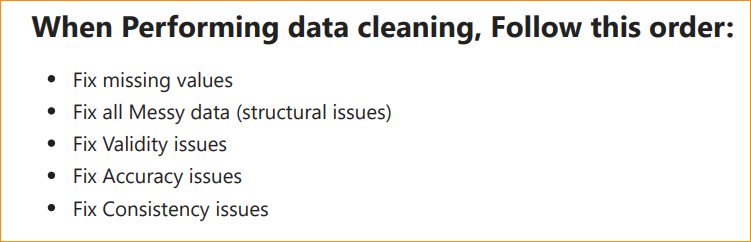

### fixing missing values

#### noOfFloor

In [536]:
df.columns

Index(['property_name', 'link', 'society', 'price', 'rate', 'areaWithType',
       'bedRoom', 'bathroom', 'balcony', 'additionalRoom', 'address',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations', 'description',
       'furnishDetails', 'features', 'rating', 'property_id', 'property_type',
       'area', 'noOfFloor'],
      dtype='object')

In [537]:
print(df[df['property_type'] == 'flat']['floorNum'].sample(5))
print(df[df['property_type'] == 'house']['noOfFloor'].sample(5))

618     12nd   of 19 Floors
1724    Ground of 14 Floors
2544     8th   of 21 Floors
429      2nd   of 17 Floors
2209    10th   of 16 Floors
Name: floorNum, dtype: object
3790    3 Floors
3608    1 Floors
3992    3 Floors
3643    4 Floors
4054    2 Floors
Name: noOfFloor, dtype: object


In [538]:
# Function to extract floor number from 'floorNum' for flats
def extract_floor(flat):
    if isinstance(flat, str):
        # Ensure there's a 'of' to split on and extract the floor number before the 'of'
        if 'of' in flat:
            # Split the string and extract only the numeric part
            floor_number = ''.join(filter(str.isdigit, flat.split('of')[0]))
            if floor_number:  # If there's a valid number extracted
                return int(floor_number)
    return np.nan  # Return NaN if there's no valid floor number

# Function to extract number of floors from 'noOfFloor' for houses
def extract_no_of_floor(house):
    if isinstance(house, str):
        # Filter digits to handle cases like "2 Floors" or "NaN"
        numbers = ''.join(filter(str.isdigit, house))
        if numbers:  # If there's a valid number extracted
            return int(numbers)
    return np.nan  # Return NaN if no valid number found

In [539]:
# Apply the functions to create 'floor_nbr'
df['floor_nbr'] = np.where(df['property_type'] == 'flat', df['floorNum'].apply(extract_floor), df['noOfFloor'].apply(extract_no_of_floor))

In [540]:
df[['property_type', 'floorNum', 'noOfFloor', 'floor_nbr']]

,property_type,floorNum,noOfFloor,floor_nbr
0,flat,4th of 4 Floors,NaN,4.0
1,flat,1st of 3 Floors,NaN,1.0
2,flat,12nd of 14 Floors,NaN,12.0
3,flat,2nd of 4 Floors,NaN,2.0
4,flat,5th of 8 Floors,NaN,5.0
...,...,...,...,...
4056,house,NaN,2 Floors,2.0
4057,house,NaN,2 Floors,2.0
4058,house,NaN,2 Floors,2.0
4059,house,NaN,2 Floors,2.0


#### area

In [541]:
print(df[df['property_type'] == 'flat'][['area','areaWithType']].sample(5))
print(df[df['property_type'] == 'house'][['area','areaWithType']].sample(5))

     area                                       areaWithType
2906  NaN             Super Built up area 2965(275.46 sq.m.)
1271  NaN  Super Built up area 1976(183.58 sq.m.)Built Up...
2177  NaN                     Carpet area: 483 (44.87 sq.m.)
429   NaN                   Carpet area: 3980 (369.75 sq.m.)
2889  NaN                   Carpet area: 1800 (167.23 sq.m.)
                       area                                       areaWithType
3745  (222 sq.m.) Plot Area  Plot area 265(221.57 sq.m.)Built Up area: 262 ...
3971  (301 sq.m.) Plot Area                        Plot area 360(301.01 sq.m.)
3057  (167 sq.m.) Plot Area                        Plot area 200(167.23 sq.m.)
3734  (420 sq.m.) Plot Area                        Plot area 502(419.74 sq.m.)
3673   (84 sq.m.) Plot Area                         Plot area 100(83.61 sq.m.)


In [542]:
# Function to extract area and calculate prop_area
def calculate_prop_area(row):
    # Ensure the 'areaWithType' column is a string to avoid TypeError
    area_with_type = str(row['areaWithType'])

    # Regex to extract Carpet area, Super Built-up area, and Built-up area along with their units
    carpet_area_match = re.search(r'Carpet area[:\s]*(\d+[\.\d]*)\s*\((\d+[\.\d]*)\s*(sq\.m\.|sq\.ft.)\)', area_with_type)
    super_builtup_area_match = re.search(r'Super Built up area[:\s]*(\d+[\.\d]*)\s*\((\d+[\.\d]*)\s*(sq\.m\.|sq\.ft.)\)', area_with_type)
    builtup_area_match = re.search(r'Built Up area[:\s]*(\d+[\.\d]*)\s*\((\d+[\.\d]*)\s*(sq\.m\.|sq\.ft.)\)', area_with_type)

    # Initialize variables to store the values and units
    carpet_area = None
    carpet_unit = None
    super_builtup_area = None
    super_builtup_unit = None
    builtup_area = None
    builtup_unit = None
    
    # Extract Carpet area if present
    if carpet_area_match:
        carpet_area = float(carpet_area_match.group(1))
        carpet_unit = carpet_area_match.group(3)
    
    # Extract Super Built-up area if present
    if super_builtup_area_match:
        super_builtup_area = float(super_builtup_area_match.group(1))
        super_builtup_unit = super_builtup_area_match.group(3)
    
    # Extract Built-up area if present
    if builtup_area_match:
        builtup_area = float(builtup_area_match.group(1))
        builtup_unit = builtup_area_match.group(3)
    
    # Normalize areas to Carpet area, taking units into account
    if carpet_area is not None:
        # If Carpet area is already available, return it with its unit
        return f"{carpet_area} {carpet_unit}"
    elif super_builtup_area is not None:
        # Assuming carpet area is approximately 75% of super built up area
        carpet_area = super_builtup_area * 0.75
        return f"{carpet_area} {super_builtup_unit}"  # Use the same unit as Super Built-up area
    elif builtup_area is not None:
        # Assuming carpet area is approximately 85% of built up area
        carpet_area = builtup_area * 0.85
        return f"{carpet_area} {builtup_unit}"  # Use the same unit as Built-up area
    else:
        return np.nan  # Return NaN if no area is available

In [543]:
# Apply the function to calculate 'prop_area' for flat properties
df['prop_area'] = df.apply(calculate_prop_area, axis=1)

In [544]:
print("Flat Property Areas:")
print(df[df['property_type'] == 'flat'][['area','areaWithType', 'prop_area']].sample(5))

print("\nHouse Property Areas:")
print(df[df['property_type'] == 'house'][['area','areaWithType', 'prop_area']].sample(5))

Flat Property Areas:
     area                                       areaWithType      prop_area
1478  NaN  Super Built up area 1785(165.83 sq.m.)Built Up...  1338.75 sq.m.
1328  NaN  Super Built up area 1702(158.12 sq.m.)Built Up...   1276.5 sq.m.
1294  NaN  Super Built up area 1900(176.52 sq.m.)Built Up...   1425.0 sq.m.
2007  NaN  Super Built up area 1465(136.1 sq.m.)Built Up ...  1098.75 sq.m.
138   NaN               Super Built up area 546(50.73 sq.m.)    409.5 sq.m.

House Property Areas:
                               area                    areaWithType  \
3225         (92 sq.m.) Carpet Area  Carpet area: 110 (91.97 sq.m.)   
3893          (334 sq.m.) Plot Area     Plot area 400(334.45 sq.m.)   
3570          (251 sq.m.) Plot Area     Plot area 300(250.84 sq.m.)   
3338      (372 sq.m.) Built-up Area                             NaN   
3083  (606-754 sq.m.) Built-up Area                             NaN   

        prop_area  
3225  110.0 sq.m.  
3893          NaN  
3570         

#### additionalRoom

In [545]:
print(df[df['property_type'] == 'flat'][['additionalRoom']].sample(5))
print(df[df['property_type'] == 'house'][['additionalRoom']].sample(5))

                        additionalRoom
2671                               NaN
1362                        Pooja Room
1920                               NaN
2382  Study Room,Pooja Room,Store Room
1359                        Pooja Room
                          additionalRoom
3184                          Study Room
3656                                 NaN
3649  Study Room,Servant Room,Store Room
3570  Pooja Room,Study Room,Servant Room
3499               Pooja Room,Study Room


In [546]:
# Function to calculate the number of additional rooms
def calculate_additional_room_count(row):
    # If the value is NaN, return 0
    if pd.isna(row['additionalRoom']):
        return 0
    # Split by comma and count the items
    else:
        rooms = row['additionalRoom'].split(',')
        return len(rooms)

In [547]:
# Apply the function to calculate 'additional_room_count'
df['additional_room_count'] = df.apply(calculate_additional_room_count, axis=1)

In [548]:
# Display the result
print(df[['property_type', 'additionalRoom', 'additional_room_count']])

     property_type                             additionalRoom  \
0             flat                                        NaN   
1             flat                                        NaN   
2             flat                                        NaN   
3             flat                                 Study Room   
4             flat                                 Study Room   
...            ...                                        ...   
4056         house         Pooja Room,Study Room,Servant Room   
4057         house                                 Study Room   
4058         house                    Study Room,Servant Room   
4059         house                                 Study Room   
4060         house  Pooja Room,Study Room,Servant Room,Others   

      additional_room_count  
0                         0  
1                         0  
2                         0  
3                         1  
4                         1  
...                     ...  
4056     

In [549]:
#### facing

In [550]:
print(df[df['property_type'] == 'flat']['facing'].sample(5))
print(df[df['property_type'] == 'house']['facing'].sample(5))

1678    South-East
1322    North-East
2510          East
112            NaN
2114           NaN
Name: facing, dtype: object
3279     NaN
3975    East
3076    East
3671     NaN
3047    East
Name: facing, dtype: object


In [551]:
df['facing'] = df['facing'].fillna('undetermined')

#### furnishDetails

In [552]:
print(df[df['property_type'] == 'flat']['furnishDetails'].sample(7))
print(df[df['property_type'] == 'house']['furnishDetails'].sample(7))

268                                                    []
2754                                                  NaN
926     ['1 Modular Kitchen', '5 AC', 'No Bed', 'No Ch...
464     ['4 Wardrobe', '1 Modular Kitchen', 'No AC', '...
807     ['5 AC', '1 Modular Kitchen', 'No Bed', 'No Ch...
2911                                                   []
2297    ['2 Wardrobe', '3 Fan', '3 Geyser', '5 Light',...
Name: furnishDetails, dtype: object
3849    ['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Ge...
3192    ['1 Water Purifier', '10 Fan', '1 Fridge', '1 ...
3973    ['1 Water Purifier', '6 Fan', '1 Exhaust Fan',...
3029    ['1 Water Purifier', '1 Fridge', '21 Fan', '1 ...
3658                                                  NaN
3664    ['1 Exhaust Fan', '1 Microwave', '7 AC', '1 Mo...
3403    ['7 Fan', '5 Geyser', '8 Light', '8 AC', '1 Ch...
Name: furnishDetails, dtype: object


In [553]:
# Function to safely evaluate the string as a list, and count the items or replace with 0 if NaN or empty
def count_or_zero(furnish):
    if pd.isna(furnish) or furnish == "[]":
        return 0
    else:
        try:
            # Safely evaluate the string to a list
            furnish_list = ast.literal_eval(furnish)
            if isinstance(furnish_list, list):  # Ensure it's a list
                return len(furnish_list)
            else:
                return 0
        except (ValueError, SyntaxError):  # In case the string is not a valid list
            return 0

# Apply the function to the 'furnishDetails' column
df['furnishDetails_count'] = df['furnishDetails'].apply(count_or_zero)

# Display the result
print(df[['property_type', 'furnishDetails', 'furnishDetails_count']])

     property_type                                     furnishDetails  \
0             flat  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...   
1             flat  ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...   
2             flat                                                NaN   
3             flat                                                NaN   
4             flat                                                 []   
...            ...                                                ...   
4056         house  ['10 Light', 'No AC', 'No Bed', 'No Chimney', ...   
4057         house                                                NaN   
4058         house  ['6 Fan', '20 Light', 'No AC', 'No Bed', 'No C...   
4059         house  ['5 Fan', '16 Light', 'No AC', 'No Bed', 'No C...   
4060         house  ['1 Water Purifier', '10 Fan', '1 Fridge', '1 ...   

      furnishDetails_count  
0                       18  
1                       18  
2                        0  
3      

In [554]:
df['furnishDetails'].iloc[0]

"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']"

#### features

In [555]:
print(df[df['property_type'] == 'flat']['features'].sample(7))
print(df[df['property_type'] == 'house']['features'].sample(7))

2001    ['Lift(s)', 'Park', 'Fitness Centre / GYM', 'C...
2881    ['Security / Fire Alarm', 'Intercom Facility',...
1404    ['Water purifier', 'Security / Fire Alarm', 'P...
2798                                                  NaN
1676    ['Security / Fire Alarm', 'Feng Shui / Vaastu ...
355     ['Intercom Facility', 'Lift(s)', 'Swimming Poo...
609     ['Water purifier', 'Security / Fire Alarm', 'P...
Name: features, dtype: object
3068                                                  NaN
3627                                                  NaN
3799    ['Feng Shui / Vaastu Compliant', 'High Ceiling...
3494                                                  NaN
3078    ['Feng Shui / Vaastu Compliant', 'Private Gard...
3749    ['Security / Fire Alarm', 'Feng Shui / Vaastu ...
4047    ['Feng Shui / Vaastu Compliant', 'Private Gard...
Name: features, dtype: object


In [556]:
# Function to safely evaluate the string as a list and count the items or replace with 0 if NaN or empty
def count_features(features):
    if pd.isna(features) or features == "[]":
        return 0
    else:
        try:
            # Safely evaluate the string to a list
            features_list = ast.literal_eval(features)
            if isinstance(features_list, list):  # Ensure it's a list
                return len(features_list)
            else:
                return 0
        except (ValueError, SyntaxError):  # In case the string is not a valid list
            return 0

# Apply the function to the 'features' column to create 'features_count'
df['features_count'] = df['features'].apply(count_features)

# Display the result
print(df[['property_type', 'features', 'features_count']])

     property_type                                           features  \
0             flat  ['Feng Shui / Vaastu Compliant', 'Security / F...   
1             flat  ['Security / Fire Alarm', 'Maintenance Staff',...   
2             flat  ['Power Back-up', 'Feng Shui / Vaastu Complian...   
3             flat  ['Security / Fire Alarm', 'Private Garden / Te...   
4             flat                                                NaN   
...            ...                                                ...   
4056         house  ['Feng Shui / Vaastu Compliant', 'High Ceiling...   
4057         house  ['High Ceiling Height', 'Maintenance Staff', '...   
4058         house  ['Feng Shui / Vaastu Compliant', 'Private Gard...   
4059         house  ['Feng Shui / Vaastu Compliant', 'Private Gard...   
4060         house  ['Centrally Air Conditioned', 'Water purifier'...   

      features_count  
0                  5  
1                  5  
2                  8  
3                 13  
4       

In [557]:
df['features'].iloc[4056]

"['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']"

#### society

In [558]:
print(df[df['property_type'] == 'flat']['society'].sample(7))
print(df[df['property_type'] == 'house']['society'].sample(7))

262               BPTP Pedestal
2358     Capital Residences 360
103         Smart World Orchard
2299              Ashiana Anmol
157      M3M Golf Hills Phase 1
1292    Emaar Palm Gardens4.1 ★
1285             The Lions CGHS
Name: society, dtype: object
3714    Emaar Emerald Hills4.1 ★
3897                         NaN
3379               DLF The Grove
3400                         NaN
3071         Uppal Southend4.0 ★
3472                   Jacobpura
3674                         NaN
Name: society, dtype: object


In [559]:
df.drop(columns=['society'], inplace=True)

#### rating

In [560]:
print(df[df['property_type'] == 'flat']['rating'].sample(7))
print(df[df['property_type'] == 'house']['rating'].sample(7))

2062    ['Green Area4 out of 5', 'Construction4 out of...
446     ['Green Area4 out of 5', 'Construction4.5 out ...
2455    ['Green Area5 out of 5', 'Construction5 out of...
1634    ['Environment5 out of 5', 'Lifestyle5 out of 5...
44      ['Environment3 out of 5', 'Safety4 out of 5', ...
1598    ['Green Area4.5 out of 5', 'Construction4.5 ou...
550     ['Green Area4.5 out of 5', 'Construction3.5 ou...
Name: rating, dtype: object
3251    ['Environment3 out of 5', 'Lifestyle4 out of 5...
3708    ['Environment4 out of 5', 'Lifestyle5 out of 5...
3443    ['Environment5 out of 5', 'Lifestyle5 out of 5...
3665    ['Environment5 out of 5', 'Lifestyle5 out of 5...
4050    ['Environment4 out of 5', 'Safety4 out of 5', ...
3250    ['Environment4 out of 5', 'Lifestyle4 out of 5...
3096    ['Environment4 out of 5', 'Lifestyle4 out of 5...
Name: rating, dtype: object


In [561]:
def extract_ratings(rating_list):
    if isinstance(rating_list, list):  # Ensure the rating is a list
        ratings = {}
        for item in rating_list:
            if isinstance(item, str):
                # Adjusted regular expression to capture category and score
                match = re.match(r'([A-Za-z\s]+)(\d+(\.\d+)?)\s*out\s+of\s+5', item.strip())
                if match:
                    category = match.group(1).strip()  # Extract category name
                    score = float(match.group(2))     # Extract score as a float
                    ratings[category] = score
        return ratings
    return {}

In [562]:
print(df['rating'].head())

0    ['Environment4 out of 5', 'Safety4 out of 5', ...
1    ['Environment4 out of 5', 'Safety4 out of 5', ...
2    ['Environment4 out of 5', 'Safety4 out of 5', ...
3                                                  NaN
4    ['Environment5 out of 5', 'Safety3 out of 5', ...
Name: rating, dtype: object


In [563]:
# Function to extract category and rating using regex
def extract_ratings(rating_str):
    ratings = {}
    if isinstance(rating_str, str):  # Check if it's a string
        # Convert the string representation of the list to an actual list
        try:
            rating_list = eval(rating_str)
        except:
            rating_list = []  # In case of invalid data
        for item in rating_list:
            if isinstance(item, str):  # Check if the item is a string
                match = re.match(r'([A-Za-z\s]+)(\d+(\.\d+)?)\s*out\s+of\s+5', item.strip())
                if match:
                    category = match.group(1).strip()  # Extract category
                    score = float(match.group(2))     # Extract score
                    ratings[category] = score  # Store category and score
    return ratings

# Apply the function to extract ratings
df['rating_dict'] = df['rating'].apply(extract_ratings)

In [564]:
rating_df = pd.json_normalize(df['rating_dict'])

# Concatenate with the original DataFrame
df = pd.concat([df, rating_df], axis=1)

In [565]:
df

,property_name,link,price,rate,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,...,features_count,rating_dict,Environment,Safety,Lifestyle,Connectivity,Green Area,Amenities,Management,Construction
0,2 BHK Flat in Krishna Colony,https://www.99acres.com/2-bhk-bedroom-apartmen...,45 Lac,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",...,5,"{'Environment': 4.0, 'Safety': 4.0, 'Lifestyle...",4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
1,2 BHK Flat in Ashok Vihar,https://www.99acres.com/2-bhk-bedroom-apartmen...,50 Lac,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",...,5,"{'Environment': 4.0, 'Safety': 4.0, 'Lifestyle...",4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
2,2 BHK Flat in Sohna,https://www.99acres.com/2-bhk-bedroom-apartmen...,40 Lac,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",...,8,"{'Environment': 4.0, 'Safety': 4.0, 'Lifestyle...",4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
3,2 BHK Flat in Sector 61 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,1.47 Crore,"₹ 12,250/sq.ft.",Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",...,13,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 BHK Flat in Sector 92 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,70 Lac,"₹ 5,204/sq.ft.",Super Built up area 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",...,0,"{'Environment': 5.0, 'Safety': 3.0, 'Lifestyle...",5.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056,4 Bedroom House for sale in Sector 26 Gurgaon,https://www.99acres.com/4-bhk-bedroom-independ...,5.5 Crore,"₹ 30,556/sq.ft.",Plot area 200(167.23 sq.m.),4 Bedrooms,4 Bathrooms,3 Balconies,"Pooja Room,Study Room,Servant Room","Sector 26 Gurgaon, Gurgaon, Haryana",...,13,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4057,3 Bedroom House for sale in DLF Phase 2,https://www.99acres.com/3-bhk-bedroom-independ...,4.25 Crore,"₹ 31,481/sq.ft.",Plot area 150(125.42 sq.m.),3 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"DLF Phase 2, Gurgaon, Haryana",...,6,"{'Environment': 5.0, 'Safety': 5.0, 'Lifestyle...",5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
4058,3 Bedroom House for sale in Sector 26 Gurgaon,https://www.99acres.com/3-bhk-bedroom-independ...,4.5 Crore,"₹ 33,333/sq.ft.",Plot area 150(125.42 sq.m.),3 Bedrooms,3 Bathrooms,2 Balconies,"Study Room,Servant Room","Sector 26 Gurgaon, Gurgaon, Haryana",...,11,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4059,3 Bedroom House for sale in Sector 26 Gurgaon,https://www.99acres.com/3-bhk-bedroom-independ...,3.25 Crore,"₹ 33,129/sq.ft.",Plot area 109(91.14 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,Study Room,"Sector 26 Gurgaon, Gurgaon, Haryana",...,12,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [566]:
df.columns

Index(['property_name', 'link', 'price', 'rate', 'areaWithType', 'bedRoom',
       'bathroom', 'balcony', 'additionalRoom', 'address', 'floorNum',
       'facing', 'agePossession', 'nearbyLocations', 'description',
       'furnishDetails', 'features', 'rating', 'property_id', 'property_type',
       'area', 'noOfFloor', 'floor_nbr', 'prop_area', 'additional_room_count',
       'furnishDetails_count', 'features_count', 'rating_dict', 'Environment',
       'Safety', 'Lifestyle', 'Connectivity', 'Green Area', 'Amenities',
       'Management', 'Construction'],
      dtype='object')

In [567]:
df[['Environment', 'Safety', 'Lifestyle', 'Connectivity', 'Green Area', 'Amenities', 'Management', 'Construction']] = df[['Environment', 'Safety', 'Lifestyle', 'Connectivity', 'Green Area', 'Amenities', 'Management', 'Construction']].fillna(0)

In [568]:
df.head()

,property_name,link,price,rate,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,...,features_count,rating_dict,Environment,Safety,Lifestyle,Connectivity,Green Area,Amenities,Management,Construction
0,2 BHK Flat in Krishna Colony,https://www.99acres.com/2-bhk-bedroom-apartmen...,45 Lac,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",...,5,"{'Environment': 4.0, 'Safety': 4.0, 'Lifestyle...",4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0
1,2 BHK Flat in Ashok Vihar,https://www.99acres.com/2-bhk-bedroom-apartmen...,50 Lac,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",...,5,"{'Environment': 4.0, 'Safety': 4.0, 'Lifestyle...",4.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0
2,2 BHK Flat in Sohna,https://www.99acres.com/2-bhk-bedroom-apartmen...,40 Lac,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",...,8,"{'Environment': 4.0, 'Safety': 4.0, 'Lifestyle...",4.0,4.0,4.0,5.0,0.0,0.0,0.0,0.0
3,2 BHK Flat in Sector 61 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,1.47 Crore,"₹ 12,250/sq.ft.",Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",...,13,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2 BHK Flat in Sector 92 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,70 Lac,"₹ 5,204/sq.ft.",Super Built up area 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",...,0,"{'Environment': 5.0, 'Safety': 3.0, 'Lifestyle...",5.0,3.0,4.0,4.0,0.0,0.0,0.0,0.0


#### nearbyLocations

In [569]:
df['nearbyLocations'].sample(5)

3865    ['Radhakrishna Shani Mandir', 'Standard charte...
281                                                   NaN
1480    ['Vatika Town Square-INXT', 'Naurangpur Road',...
2891    ['SS Omnia Mall', 'Golf Course Ext Rd', 'Knowl...
1041    ['Dwarka Sector 21 Metro Station', 'NeoSquare ...
Name: nearbyLocations, dtype: object

In [570]:
# Convert the string representation of a list to an actual list
df['nearbyLocations'] = df['nearbyLocations'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now count the number of items in the list
df['nearbyLocations_count'] = df['nearbyLocations'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Display the first 5 rows
print(df[['nearbyLocations', 'nearbyLocations_count']].head())

                                     nearbyLocations  nearbyLocations_count
0  [Chintapurni Mandir, State bank ATM, Pearl Den...                     50
1  [Chintapurni Mandir, Sheetla Mata Mandir, Stat...                     49
2  [Huda City Metro, Golf Course extn road, Rajiv...                      6
3  [Sector 55-56 Metro station, Bestech Central S...                      9
4  [Yadav Clinic, Bangali Clinic, Dr. J. S. Sarka...                     11


In [571]:
df['nearbyLocations'].loc[2]

['Huda City Metro',
 'Golf Course extn road',
 'Rajiv Chowk',
 'IGI Airport',
 'IMT Sohna',
 'Damdama Lake']

#### price

In [572]:
df.dropna(subset=['price'], inplace=True)

#### agePossession

In [573]:
df['agePossession'].sample(5)

2474    1 to 5 Year Old
3514          undefined
1387    1 to 5 Year Old
1783    1 to 5 Year Old
601     0 to 1 Year Old
Name: agePossession, dtype: object

In [574]:
def extract_age_average(age_str):
    # First, check if the value is a string. If it's not, return NaN.
    if not isinstance(age_str, str):
        return np.nan

    # Check if the string contains a range of numbers like '5 to 10 Year Old'
    match = re.match(r'(\d+)\s*to\s*(\d+)', age_str)
    
    if match:
        # If it matches the range, calculate the average
        num1 = int(match.group(1))
        num2 = int(match.group(2))
        return (num1 + num2) / 2
    
    # Check if the string contains only a single number with 'Year Old' or 'Year' (e.g., '10+ Year Old')
    elif re.match(r'(\d+)\+?\s*Year(s)?\s*Old', age_str):
        return int(re.match(r'(\d+)\+?\s*Year(s)?\s*Old', age_str).group(1))
    
    # If it's "undefined" or any other value, return NaN or 0 (you can decide how to handle it)
    elif age_str.lower() == "undefined":
        return 0  # You can also return 0 here if you prefer
    
    return np.nan  # If there's no match, return NaN or a default value

# Apply the function to the 'agePossession' column
df['agePossession_avg'] = df['agePossession'].apply(extract_age_average)

# Display the first few rows of the new column
print(df[['agePossession', 'agePossession_avg']].head())

        agePossession  agePossession_avg
0     1 to 5 Year Old                3.0
1        10+ Year Old               10.0
2     0 to 1 Year Old                0.5
3              Dec-23                NaN
4  Under Construction                NaN


In [575]:
df.drop(columns=['agePossession'], inplace=True)

In [576]:
df['agePossession_avg'] = df['agePossession_avg'].fillna(0)

#### floor_nbr

- It still has missing values so we can remove them since there is no pattern

In [577]:
df[df['floor_nbr'].isna()]['property_type'].value_counts()

property_type
flat     140
house     20
Name: count, dtype: int64

In [578]:
df.dropna(subset=['floor_nbr'], inplace=True)

#### rate

In [579]:
df[df['rate'].isna()][['prop_area','price']]

,prop_area,price
1644,4800.0 sq.m.,Price on Request
1972,650.0 sq.m.,Price on Request
2054,1100.75 sq.m.,Price on Request
2357,552.0 sq.m.,Price on Request
2522,593.0 sq.m.,Price on Request
2549,1462.0 sq.m.,Price on Request
2640,593.0 sq.m.,Price on Request
2959,1235.25 sq.m.,Price on Request
2972,4930.0 sq.m.,Price on Request
3277,680.0 sq.m.,Price on Request


In [580]:
df = df[df['price'] != 'Price on Request']

In [581]:
df[df['rate'].isna()][['prop_area','price']]

,prop_area,price


#### cols with missing value

In [582]:
# Get the null count for each column
null_counts = df.isnull().sum().reset_index()

# Rename the columns for easier access
null_counts.columns = ['Column', 'Null Count']

# Filter the columns where Null Count is not 0
null_counts_with_null = null_counts[null_counts['Null Count'] != 0]


In [583]:
null_counts_with_null

,Column,Null Count
8,additionalRoom,1589
9,address,11
10,floorNum,938
12,nearbyLocations,197
14,furnishDetails,986
15,features,657
16,rating,437
19,area,2858
20,noOfFloor,2858
22,prop_area,768


In [584]:
df.shape

(3796, 37)

#### removing extra cols

In [585]:
df[['property_type', 'floorNum', 'noOfFloor', 'floor_nbr']]

,property_type,floorNum,noOfFloor,floor_nbr
0,flat,4th of 4 Floors,NaN,4.0
1,flat,1st of 3 Floors,NaN,1.0
2,flat,12nd of 14 Floors,NaN,12.0
3,flat,2nd of 4 Floors,NaN,2.0
4,flat,5th of 8 Floors,NaN,5.0
...,...,...,...,...
4056,house,NaN,2 Floors,2.0
4057,house,NaN,2 Floors,2.0
4058,house,NaN,2 Floors,2.0
4059,house,NaN,2 Floors,2.0


In [586]:
df.drop(columns=['floorNum', 'noOfFloor'], inplace=True)

C:\Users\iampr\AppData\Local\Temp\ipykernel_16396\3493640337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['floorNum', 'noOfFloor'], inplace=True)


In [587]:
df[df['prop_area'].isna()]['property_type'].value_counts()

property_type
house    745
flat      23
Name: count, dtype: int64

In [588]:
df[df['prop_area'].isna()][['areaWithType','area','prop_area']]

,areaWithType,area,prop_area
107,Super Built up area 89,NaN,NaN
161,Built Up area: 118 Carpet area: 86 sq.m.,NaN,NaN
186,Carpet area: 127.3,NaN,NaN
301,Built Up area: 97 Carpet area: 92 sq.m.,NaN,NaN
328,Built Up area: 97 Carpet area: 92 sq.m.,NaN,NaN
...,...,...,...
4056,Plot area 200(167.23 sq.m.),(167 sq.m.) Plot Area,NaN
4057,Plot area 150(125.42 sq.m.),(125 sq.m.) Plot Area,NaN
4058,Plot area 150(125.42 sq.m.),(125 sq.m.) Plot Area,NaN
4059,Plot area 109(91.14 sq.m.),(91 sq.m.) Plot Area,NaN


In [589]:
# Function to extract area and calculate prop_area
def calculate_prop_area(row):
    area_with_type = str(row['areaWithType'])

    # Updated regex to capture Plot area and Built Up area with or without colon, and area inside parentheses
    plot_area_match = re.search(r'Plot area[:\s]*(\d+[\.\d]*)\s*\((\d+[\.\d]*)\s*(sq\.m\.|sq\.ft.)\)', area_with_type)
    built_up_area_match = re.search(r'Built Up area[:\s]*(\d+[\.\d]*)\s*\((\d+[\.\d]*)\s*(sq\.m\.|sq\.ft.)\)', area_with_type)

    # Initialize variables to store area values and units
    plot_area = None
    plot_unit = None
    built_up_area = None
    built_up_unit = None

    # Extract Plot area if present
    if plot_area_match:
        plot_area = float(plot_area_match.group(1))  # Area value (e.g., 160)
        plot_unit = plot_area_match.group(3)  # Unit (e.g., sq.m.)

    # Extract Built Up area if present
    if built_up_area_match:
        built_up_area = float(built_up_area_match.group(1))  # Area value (e.g., 340)
        built_up_unit = built_up_area_match.group(3)  # Unit (e.g., sq.m.)

    # If Plot area is found, return the formatted result
    if plot_area is not None:
        return f"{plot_area} {plot_unit}"
    
    # If no Plot area, check for Built Up area and return the formatted result
    if built_up_area is not None:
        return f"{built_up_area} {built_up_unit}"

    # Return NaN if no area is available
    return np.nan

In [590]:
# Apply the function to fill 'prop_area' for rows where 'prop_area' is NaN
df.loc[df['prop_area'].isna(), 'prop_area'] = df.loc[df['prop_area'].isna()].apply(calculate_prop_area, axis=1)

In [591]:
df[df['prop_area'].isna()][['areaWithType','area','prop_area']]

,areaWithType,area,prop_area
107,Super Built up area 89,NaN,NaN
161,Built Up area: 118 Carpet area: 86 sq.m.,NaN,NaN
186,Carpet area: 127.3,NaN,NaN
301,Built Up area: 97 Carpet area: 92 sq.m.,NaN,NaN
328,Built Up area: 97 Carpet area: 92 sq.m.,NaN,NaN
1936,Carpet area: 76.44,NaN,NaN
1948,Carpet area: 108.4,NaN,NaN
2006,Carpet area: 200,NaN,NaN
2008,Super Built up area 145Carpet area: 86 sq.m.,NaN,NaN
2069,Carpet area: 77.53,NaN,NaN


In [592]:
df.dropna(subset=['prop_area'], inplace=True)

C:\Users\iampr\AppData\Local\Temp\ipykernel_16396\3294251778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['prop_area'], inplace=True)


In [593]:
# Get the null count for each column
null_counts = df.isnull().sum().reset_index()

# Rename the columns for easier access
null_counts.columns = ['Column', 'Null Count']

# Filter the columns where Null Count is not 0
null_counts_with_null = null_counts[null_counts['Null Count'] != 0]
print(null_counts_with_null)


             Column  Null Count
8    additionalRoom        1571
9           address          10
11  nearbyLocations         196
13   furnishDetails         967
14         features         650
15           rating         427
18             area        2835


In [594]:
cols_to_remove = null_counts_with_null['Column'].tolist()
cols_to_remove

['additionalRoom',
 'address',
 'nearbyLocations',
 'furnishDetails',
 'features',
 'rating',
 'area']

In [595]:
df.columns

Index(['property_name', 'link', 'price', 'rate', 'areaWithType', 'bedRoom',
       'bathroom', 'balcony', 'additionalRoom', 'address', 'facing',
       'nearbyLocations', 'description', 'furnishDetails', 'features',
       'rating', 'property_id', 'property_type', 'area', 'floor_nbr',
       'prop_area', 'additional_room_count', 'furnishDetails_count',
       'features_count', 'rating_dict', 'Environment', 'Safety', 'Lifestyle',
       'Connectivity', 'Green Area', 'Amenities', 'Management', 'Construction',
       'nearbyLocations_count', 'agePossession_avg'],
      dtype='object')

In [596]:
df.drop(columns=cols_to_remove, inplace=True)

C:\Users\iampr\AppData\Local\Temp\ipykernel_16396\3446868703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=cols_to_remove, inplace=True)


In [597]:
df.isnull().sum()

property_name            0
link                     0
price                    0
rate                     0
areaWithType             0
bedRoom                  0
bathroom                 0
balcony                  0
facing                   0
description              0
property_id              0
property_type            0
floor_nbr                0
prop_area                0
additional_room_count    0
furnishDetails_count     0
features_count           0
rating_dict              0
Environment              0
Safety                   0
Lifestyle                0
Connectivity             0
Green Area               0
Amenities                0
Management               0
Construction             0
nearbyLocations_count    0
agePossession_avg        0
dtype: int64

#### Missing value imputation completed

In [598]:
df.to_excel(r"data/99acre_raw_data/99acres_property_data_v2.xlsx", index=False)

### Fixing messy data issues

In [641]:
df = pd.read_excel(r"data/99acre_raw_data/99acres_property_data_v2.xlsx")

#### issues with data

- ~~property_name: extract location/sector details - messy~~
- price - change into numbers - dirty
- rate - change into numbers - dirty
- ~~areaWithType - messy data - make seperate cols~~
- bedRoom - dirty data - change to number
- bathroom - dirty data - change to number
- balcony - dirty data - change to number
- additionalRoom - dirty data - change to number
- ~~address - messy data - extract additional info into seperate cols~~
- ~~floorNum - messy data - extract additional info into seperate cols~~
- ~~facing - null values with address col~~
- agePossession - change to number - dirty data
- nearbyLocations - change to number - dirty data
- ~~furnishDetails - change to nbr or change to seperate cols~~
- features - change to nbr or change to seperate cols
- rating - change to nbr or change to seperate cols
- ~~area - change to number - dirty data~~
- ~~noOfFloor - change to number - dirty data~~

#### property_name

In [642]:
print(df[df['property_type'] == 'flat']['property_name'])
print(df[df['property_type'] == 'house']['property_name'])

0           2 BHK Flat in Krishna Colony
1              2 BHK Flat in Ashok Vihar
2                    2 BHK Flat in Sohna
3        2 BHK Flat in Sector 61 Gurgaon
4        2 BHK Flat in Sector 92 Gurgaon
                      ...               
2830     3 BHK Flat in Sector 86 Gurgaon
2831     5 BHK Flat in Sector 48 Gurgaon
2832    3 BHK Flat in Sector 108 Gurgaon
2833           3 BHK Flat in DLF Phase 3
2834     4 BHK Flat in Sector 54 Gurgaon
Name: property_name, Length: 2835, dtype: object
2835      5 Bedroom House for sale in Sector 70A Gurgaon
2836    5 Bedroom House for sale in Sector 21A Faridabad
2837    10 Bedroom House for sale in Sushant Lok Phase 1
2838      21 Bedroom House for sale in Sector 54 Gurgaon
2839    12 Bedroom House for sale in Sushant Lok Phase 1
                              ...                       
3759       4 Bedroom House for sale in Sector 26 Gurgaon
3760             3 Bedroom House for sale in DLF Phase 2
3761       3 Bedroom House for sale in Secto

In [643]:
df['prop_location'] = df['property_name'].str.split("in").str[1]

In [644]:
df.drop(columns=['property_name'], inplace=True)

### fixing dirty data

#### issues with data

- ~~property_name: extract location/sector details - messy~~
- ~~price - change into numbers - dirty~~
- ~~rate - change into numbers - dirty~~
- ~~areaWithType - messy data - make seperate cols~~
- ~~bedRoom - dirty data - change to number~~
- ~~bathroom - dirty data - change to number~~
- ~~balcony - dirty data - change to number~~
- ~~additionalRoom - dirty data - change to number~~
- ~~address - messy data - extract additional info into seperate cols~~
- ~~floorNum - messy data - extract additional info into seperate cols~~
- ~~facing - null values with address col~~
- agePossession - change to number - dirty data
- nearbyLocations - change to number - dirty data
- ~~furnishDetails - change to nbr or change to seperate cols~~
- features - change to nbr or change to seperate cols
- rating - change to nbr or change to seperate cols
- ~~area - change to number - dirty data~~
- ~~noOfFloor - change to number - dirty data~~

#### price

In [645]:
df['price'].str.split(" ").str[1].value_counts()

price
Crore    2699
Lac      1065
Name: count, dtype: int64

In [646]:
df['price'].sample(5)

2826     1.4 Crore
1761        98 Lac
2335    1.55 Crore
849     2.36 Crore
262        4 Crore
Name: price, dtype: object

In [647]:
# Function to convert price to numeric
def convert_price_to_number(price):
    price = str(price)  # Ensure it's a string

    # Remove spaces and lower the case for uniformity
    price = price.strip().lower()

    # Check for 'crore' and 'lac' and convert accordingly
    if 'crore' in price:
        price = price.replace('crore', '').strip()
        return float(price) * 1e7  # 1 Crore = 10,000,000
    elif 'lac' in price:
        price = price.replace('lac', '').strip()
        return float(price) * 1e5  # 1 Lac = 100,000
    else:
        return float(price)  # No unit, just return the number

In [648]:
df['price'] = df['price'].apply(convert_price_to_number)

#### rate & prop_area

In [649]:
df[['rate','prop_area']]

,rate,prop_area
0,"₹ 5,000/sq.ft.",900.0 sq.m.
1,"₹ 7,692/sq.ft.",650.0 sq.m.
2,"₹ 6,722/sq.ft.",595.0 sq.m.
3,"₹ 12,250/sq.ft.",1200.0 sq.m.
4,"₹ 5,204/sq.ft.",1008.75 sq.m.
...,...,...
3759,"₹ 30,556/sq.ft.",200.0 sq.m.
3760,"₹ 31,481/sq.ft.",150.0 sq.m.
3761,"₹ 33,333/sq.ft.",150.0 sq.m.
3762,"₹ 33,129/sq.ft.",109.0 sq.m.


In [650]:
# Function to convert prop_area from sq.m. to sq.ft.
def convert_area_to_sqft(area):
    # Extract the numeric value and convert to float
    area_value = float(area.split()[0])
    # Convert square meters to square feet
    area_in_sqft = area_value * 10.7639
    # Return the result in square feet as a string with the unit
    return f"{area_in_sqft:,.2f} sq.ft."

# Apply the conversion to the 'prop_area' column
df['total_area_in_sqft'] = df['prop_area'].apply(convert_area_to_sqft)

In [651]:
df.drop(columns=['prop_area'], inplace=True)

In [652]:
df[['rate','total_area_in_sqft']]

,rate,total_area_in_sqft
0,"₹ 5,000/sq.ft.","9,687.51 sq.ft."
1,"₹ 7,692/sq.ft.","6,996.53 sq.ft."
2,"₹ 6,722/sq.ft.","6,404.52 sq.ft."
3,"₹ 12,250/sq.ft.","12,916.68 sq.ft."
4,"₹ 5,204/sq.ft.","10,858.08 sq.ft."
...,...,...
3759,"₹ 30,556/sq.ft.","2,152.78 sq.ft."
3760,"₹ 31,481/sq.ft.","1,614.59 sq.ft."
3761,"₹ 33,333/sq.ft.","1,614.59 sq.ft."
3762,"₹ 33,129/sq.ft.","1,173.27 sq.ft."


In [653]:
# Remove ₹, commas, and '/sq.ft.' from the 'rate' column, then convert to float
df['rate_per_sqft'] = df['rate'].str.replace('₹', '', regex=False) \
                                 .str.replace('/sq.ft.', '', regex=False) \
                                 .str.replace(',', '', regex=False) \
                                 .astype(float)

# Remove ' sq.ft.' from the 'total_area_in_sqft' column, then convert to float
df['total_area_in_sqft'] = df['total_area_in_sqft'].str.replace(' sq.ft.', '', regex=False) \
                                                   .str.replace(',', '', regex=False) \
                                                   .astype(float)

# Rename the 'rate' column to 'rate_per_sqft'
df = df.drop(columns=['rate'])  # Drop the old 'rate' column

In [654]:
df[['rate_per_sqft','total_area_in_sqft']]

,rate_per_sqft,total_area_in_sqft
0,5000.0,9687.51
1,7692.0,6996.53
2,6722.0,6404.52
3,12250.0,12916.68
4,5204.0,10858.08
...,...,...
3759,30556.0,2152.78
3760,31481.0,1614.59
3761,33333.0,1614.59
3762,33129.0,1173.27


#### bedroom, bathroom, balcony

In [655]:
df.columns

Index(['link', 'price', 'areaWithType', 'bedRoom', 'bathroom', 'balcony',
       'facing', 'description', 'property_id', 'property_type', 'floor_nbr',
       'additional_room_count', 'furnishDetails_count', 'features_count',
       'rating_dict', 'Environment', 'Safety', 'Lifestyle', 'Connectivity',
       'Green Area', 'Amenities', 'Management', 'Construction',
       'nearbyLocations_count', 'agePossession_avg', 'prop_location',
       'total_area_in_sqft', 'rate_per_sqft'],
      dtype='object')

In [656]:
df[['bedRoom','bathroom','balcony']]

,bedRoom,bathroom,balcony
0,2 Bedrooms,2 Bathrooms,1 Balcony
1,2 Bedrooms,2 Bathrooms,1 Balcony
2,2 Bedrooms,2 Bathrooms,3 Balconies
3,2 Bedrooms,2 Bathrooms,2 Balconies
4,2 Bedrooms,2 Bathrooms,3 Balconies
...,...,...,...
3759,4 Bedrooms,4 Bathrooms,3 Balconies
3760,3 Bedrooms,2 Bathrooms,3 Balconies
3761,3 Bedrooms,3 Bathrooms,2 Balconies
3762,3 Bedrooms,3 Bathrooms,3 Balconies


In [657]:
df['bedRoom'] = df['bedRoom'].astype(str).str.extract('(\d+)').fillna(0).astype(int)
df['bathroom'] = df['bathroom'].astype(str).str.extract('(\d+)').fillna(0).astype(int)
df['balcony'] = df['balcony'].astype(str).str.extract('(\d+)').fillna(0).astype(int)

In [658]:
df[['bedRoom','bathroom','balcony']]

,bedRoom,bathroom,balcony
0,2,2,1
1,2,2,1
2,2,2,3
3,2,2,2
4,2,2,3
...,...,...,...
3759,4,4,3
3760,3,2,3
3761,3,3,2
3762,3,3,3


#### remove unwanted cols

In [659]:
df.columns

Index(['link', 'price', 'areaWithType', 'bedRoom', 'bathroom', 'balcony',
       'facing', 'description', 'property_id', 'property_type', 'floor_nbr',
       'additional_room_count', 'furnishDetails_count', 'features_count',
       'rating_dict', 'Environment', 'Safety', 'Lifestyle', 'Connectivity',
       'Green Area', 'Amenities', 'Management', 'Construction',
       'nearbyLocations_count', 'agePossession_avg', 'prop_location',
       'total_area_in_sqft', 'rate_per_sqft'],
      dtype='object')

In [660]:
df.drop(columns=['rating_dict', 'link', 'description', 'property_id'], inplace=True)

In [661]:
df.isnull().sum()

price                    0
areaWithType             0
bedRoom                  0
bathroom                 0
balcony                  0
facing                   0
property_type            0
floor_nbr                0
additional_room_count    0
furnishDetails_count     0
features_count           0
Environment              0
Safety                   0
Lifestyle                0
Connectivity             0
Green Area               0
Amenities                0
Management               0
Construction             0
nearbyLocations_count    0
agePossession_avg        0
prop_location            0
total_area_in_sqft       0
rate_per_sqft            0
dtype: int64

### All issues with data has been fixed - Importing data for EDA

In [662]:
df.to_excel(r"data/99acre_raw_data/99acres_property_data_v3.xlsx", index=False)

In [663]:
df.shape

(3764, 24)